In [31]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf

In [32]:
data = pd.read_csv("academic_dataset.csv")

# Data Preprocessing

In [33]:
#displaying the header of the table
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [34]:
data.shape

(480, 17)

In [35]:
# Check for missing values (if any)
data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [37]:
#Dropping the unwanted data attributes which is not useful to build the model
data.drop(['NationalITy','PlaceofBirth','SectionID','Relation'], axis=1, inplace=True)

data.head()

,gender,StageID,GradeID,Topic,Semester,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,lowerlevel,G-04,IT,F,15,16,2,20,Yes,Good,Under-7,M
1,M,lowerlevel,G-04,IT,F,20,20,3,25,Yes,Good,Under-7,M
2,M,lowerlevel,G-04,IT,F,10,7,0,30,No,Bad,Above-7,L
3,M,lowerlevel,G-04,IT,F,30,25,5,35,No,Bad,Above-7,L
4,M,lowerlevel,G-04,IT,F,40,50,12,50,No,Bad,Above-7,M


In [38]:
data.shape

(480, 13)

In [39]:
# Encoding categorical variables into numerical values using LabelEncoder
label_encoders = {}
categorical_cols = ['gender', 'StageID', 'GradeID',
                    'Topic', 'Semester', 'ParentAnsweringSurvey', 
                    'ParentschoolSatisfaction', 'StudentAbsenceDays']

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [40]:
# simple and quick way to assign specific numbers to each class
data.loc[data['Class']=='M','Class']=0
data.loc[data['Class']=='H','Class']=1
data.loc[data['Class']=='L','Class']=2

In [41]:
data.head()

,gender,StageID,GradeID,Topic,Semester,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,2,1,7,0,15,16,2,20,1,1,1,0
1,1,2,1,7,0,20,20,3,25,1,1,1,0
2,1,2,1,7,0,10,7,0,30,0,0,0,2
3,1,2,1,7,0,30,25,5,35,0,0,0,2
4,1,2,1,7,0,40,50,12,50,0,0,0,0


In [42]:
# Split into features and target
X = data.drop('Class', axis=1)
y = data['Class']

print(y.value_counts())

Class
0    211
1    142
2    127
Name: count, dtype: int64


In [43]:
# Feature scaling is used to make sure all the values in the dataset are on the same scale.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns=['gender', 'StageID', 'GradeID', 
                    'Topic', 'Semester','raisedhands','VisITedResources',
                    'AnnouncementsView','Discussion', 'ParentAnsweringSurvey',
                    'ParentschoolSatisfaction','StudentAbsenceDays'])

In [44]:
X.head()

,gender,StageID,GradeID,Topic,Semester,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,1.0,1.0,0.111111,0.636364,0.0,0.15,0.161616,0.020408,0.193878,1.0,1.0,1.0
1,1.0,1.0,0.111111,0.636364,0.0,0.20,0.202020,0.030612,0.244898,1.0,1.0,1.0
2,1.0,1.0,0.111111,0.636364,0.0,0.10,0.070707,0.000000,0.295918,0.0,0.0,0.0
3,1.0,1.0,0.111111,0.636364,0.0,0.30,0.252525,0.051020,0.346939,0.0,0.0,0.0
4,1.0,1.0,0.111111,0.636364,0.0,0.40,0.505051,0.122449,0.500000,0.0,0.0,0.0


In [45]:
# changing the data type of y to integers
y = y.astype('int')
y.dtype

dtype('int32')

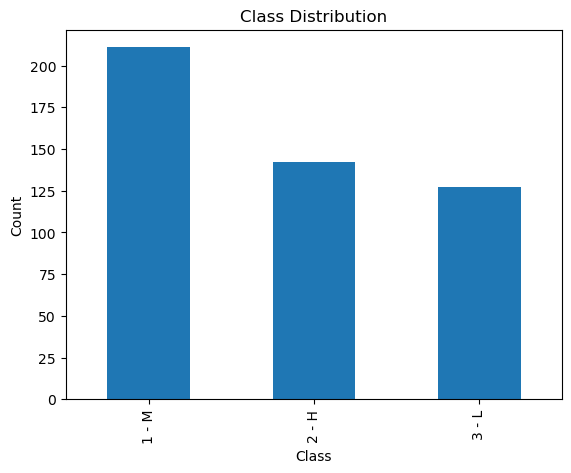

In [46]:
# Plotting the bar chart
value_counts = y.value_counts()
value_counts.plot(kind='bar')

# Customizing the x-axis labels
plt.xticks(ticks=[0, 1, 2], labels=['1 - M', '2 - H', '3 - L'])

# Adding labels and title (optional)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

# Show the plot
plt.show()

In [47]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
X_train.shape, X_val.shape

((336, 12), (144, 12))

# Model Building

In [49]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model architecture
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))  # Output layer for 3 classes

# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Implement early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_val, y_val), 
                    callbacks=[early_stopping, lr_scheduler])

C:\Users\vihar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.2415 - loss: 1.4636 - val_accuracy: 0.2500 - val_loss: 1.1345 - learning_rate: 1.0000e-04
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2766 - loss: 1.4352 - val_accuracy: 0.2569 - val_loss: 1.1304 - learning_rate: 1.0000e-04
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2962 - loss: 1.3591 - val_accuracy: 0.2708 - val_loss: 1.1256 - learning_rate: 1.0000e-04
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2987 - loss: 1.3546 - val_accuracy: 0.2708 - val_loss: 1.1201 - learning_rate: 1.0000e-04
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3236 - loss: 1.2667 - val_accuracy: 0.2708 - val_loss: 1.1150 - learning_rate: 1.0000e-04
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2992 - loss: 1.2357 - val_accuracy: 0.2917 - val_loss: 1.1092 - learning_rate: 1.0000e-04
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy:

In [50]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,547 (37.30 KB)

 Trainable params: 3,139 (12.26 KB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 6,280 (24.54 KB)

# Model Evaluation

In [51]:
# Using evaluate method
model.evaluate(X_val, y_val)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7248 - loss: 0.6002 


[0.6315983533859253, 0.7083333134651184]

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


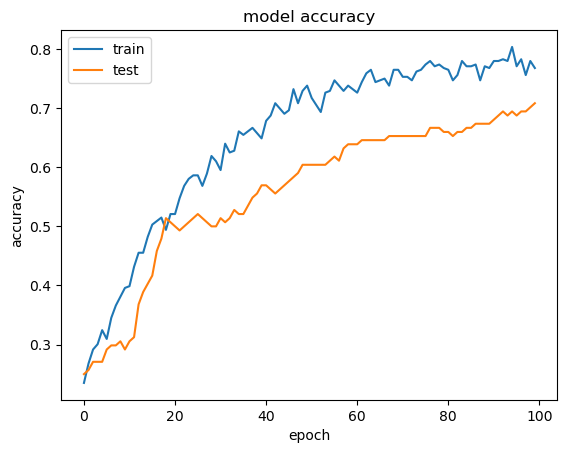

In [52]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

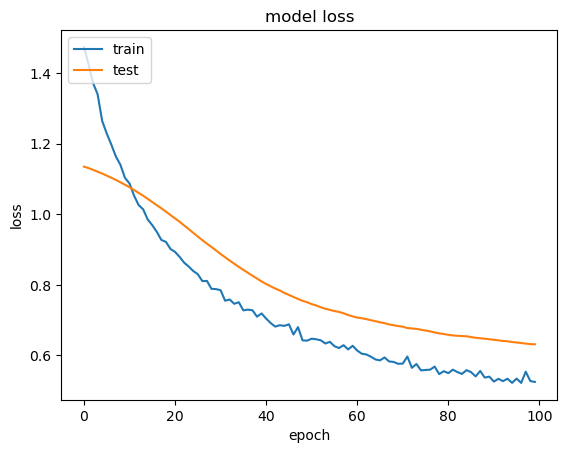

In [53]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [54]:
y_pred = model.predict(X_val)
y_pred[:5]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[0.5037039 , 0.0657687 , 0.43052742],
       [0.3118682 , 0.06975205, 0.6183797 ],
       [0.46107146, 0.52871525, 0.01021323],
       [0.31579116, 0.6702454 , 0.01396338],
       [0.2823635 , 0.7123174 , 0.0053191 ]], dtype=float32)

In [55]:
y_pred = np.argmax(y_pred, axis=1)
y_pred[:5]

array([0, 2, 1, 1, 1], dtype=int64)

In [56]:
y_val[:5]

73     0
414    2
394    1
277    1
399    1
Name: Class, dtype: int32

In [57]:
from sklearn.metrics import classification_report

# Evaluate on the validation set
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

# Predict classes for evaluation
y_pred = model.predict(X_val)
y_pred_classes = y_pred.argmax(axis=1)

# Calculate classification metrics
report = classification_report(y_val, y_pred_classes, output_dict=True)

# Print the full classification report
print("Classification Report:")
print(classification_report(y_val, y_pred_classes))

# Extract metrics
f1_scores = {label: metrics['f1-score'] for label, metrics in report.items() if label.isdigit()}
f1_score_macro = report['macro avg']['f1-score']
f1_score_weighted = report['weighted avg']['f1-score']

# Print individual metrics
print("Metrics by Class:")
for label, metrics in report.items():
    if label.isdigit():
        print(f"Class {label} - Precision: {metrics['precision']:.4f}, Recall: {metrics['recall']:.4f}, F1-Score: {metrics['f1-score']:.4f}")

print(f"Macro Average F1-Score: {f1_score_macro:.4f}")
print(f"Weighted Average F1-Score: {f1_score_weighted:.4f}")

# Optionally, print overall accuracy if needed
accuracy = val_acc  # Accuracy obtained from model evaluation
print(f"Overall Accuracy: {accuracy:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7248 - loss: 0.6002 
Validation Loss: 0.6315983533859253
Validation Accuracy: 0.7083333134651184
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.57      0.65        68
           1       0.61      0.81      0.69        31
           2       0.75      0.84      0.79        45

    accuracy                           0.71       144
   macro avg       0.70      0.74      0.71       144
weighted avg       0.72      0.71      0.70       144

Metrics by Class:
Class 0 - Precision: 0.7500, Recall: 0.5735, F1-Score: 0.6500
Class 1 - Precision: 0.6098, Recall: 0.8065, F1-Score: 0.6944
Class 2 - Precision: 0.7451, Recall: 0.8444, F1-Score: 0.7917
Macro Average F1-Score: 0.7120
Weighted Average F1-Score: 0.7038
Overall Accuracy: 0.7083


### Save model using SavedModel format

In [58]:
model.save("new_model_1.keras")

### Load model using SavedModel format

In [59]:
new_model_1 = tf.keras.models.load_model('new_model_1.keras')

In [60]:
new_model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,547 (37.30 KB)

 Trainable params: 3,139 (12.26 KB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 6,280 (24.54 KB)